Everybody knows EM algorithm has great capacity dealing with incomplete data. However, there could be more potentials about EM algorithm. The following ideas are a mixture from courses at CMU and UW.  
**Background**  
Maximum likelihood estimator is an extremely useful tool for estimating parameters. Basically, the form of **MLE** is like this:  
$$\hat{\theta} = arg\underset{\theta}max \log p(y|\theta)$$
However, sometimes it could be really difficult to solve this problem. Namely, if there are some sums inside the $\log$ function. EM algorithm is kind of method to approximate the optimum using iterations. To understand, say, we have observed data $y$ and $\theta$ is the parameter for modeling, we assume that $y$ is only part of the data from $x$ (complete data). We make a guess about $x$ and solve for the $\theta$ that maximize the expected log-likelihood of complete data $x$.  
**E Step**: calculate $p(x|\theta^{(i)})$  
**M Step**: $\theta^{(i+1)} = arg\underset{\theta}max \ E_{x|y,\theta^{(i)}} [\log p(x|\theta)]$  
The point is, EM algorithm is not limited to models with hidden variables. If some labels are missing for a supervised problem, we could use EM. If all the variables are observed yet hard to solve the optimum, we could assume some complete data and use EM.  
  
**E.g.**  Toy Selection  
You ask $n$ kids to select a toy out of 4 choices. Let $y = [y_1,..,y_4]^{T}$ denote the histogram of their choices where $y_{1}$ represents the number of kids choosing toy 1, etc. For each kid, the probility of choosing a toy is $p = [p_1, p_2, p_3, p_4]$. We model the probilities in this way: $p = [\frac{1}{2}+\frac{1}{4}\theta, \frac{1}{4}(1-\theta), \frac{1}{4}(1-\theta), \frac{1}{4}\theta]$. Thus, for **MLE**,
\begin{align}
\hat{\theta} &= arg\underset{\theta}max \log \frac{n!}{y_1!y_2!y_3!y_4!} \left(\frac{1}{2}+\frac{\theta}{4}\right)^{y_1} \left(\frac{1-\theta}{4}\right)^{y_2} \left(\frac{1-\theta}{4}\right)^{y_3} \left(\frac{\theta}{4}\right)^{y_4} \\ 
&= y_1 \log \left(\frac{1}{2}+\frac{\theta}{4}\right) + (y_2+y_3) \log \left(1-\theta\right) + y_4 \log (\theta) \\  
\end{align}
which is not as easily to be solved as basic ones. We have 3 solutions: solve it by your hands, use gradient ascend or EM algorithm.  
1. $\frac{\partial l(\theta)}{\theta}= 0 \Rightarrow \theta = 0.791$  
2. Gradient ascend: $\theta^{(i+1)}:=\theta^{(i)} + \eta \frac{\partial l(\theta)}{\theta}$  
3. EM algorithm  
To use EM, we need to specify what the complete data $x$ is. We wanna have such a $x$ that the probility mass function only has $\log \theta$ and $\log (1-\theta)$. The only problem lies in $y_1$, where the problility of choosing $y_1$ is not the form we like. However, if we assume $y = [x_1+x_2, x_3, x_4, x_5]^{T}$, we could get: 
\begin{equation}
P(x|\theta) = \frac{n!}{\prod_{i=1}^{5}x_{i}!} \left(\frac{1}{2}\right)^{x_1} \left(\frac{\theta}{4}\right)^{x_2+x_5} \left(\frac{1-\theta}{4}\right)^{x_3+x_4}
\end{equation}
Thus, 
\begin{align}
\theta^{(i+1)} &= arg\underset{\theta}max \ E_{x|y,\theta} [\log p(x|\theta)] \\
&= arg\underset{\theta}max \ E_{x|y,\theta} [(x_2+x_5) \log\theta + (x_3+x_4) \log (1-\theta)]
\end{align}
It's quite straitfoward to get the conditional expected average of $x$, 
\begin{equation}
E_{x|y,\theta} = [\frac{2}{2+\theta}y_1, \frac{2}{2+\theta}y_1, y_2, y_3, y_4]
\end{equation}
Thus,
\begin{align}
\theta^{(i+1)} &= arg\underset{\theta}max \left(\frac{\theta^{(i)}y_1}{2+\theta^{(i)}}+y_4\right) \log \theta + (y_2+y_3) \log (1-\theta) \\
&= \frac{\frac{\theta^{(i)}y_1}{2+\theta^{(i)}}+y_4}{\frac{\theta^{(i)}y_1}{2+\theta^{(i)}}+y_2+y_3+y_4}\\
\end{align}
We now test their ability of convergence for each algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

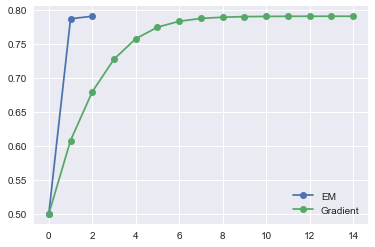

In [3]:
def em_estimator(y, theta=0.5, threshold=0.001):
    '''EM estimator.
    
    @param:
    y: list, containing 4 ints.
    @return:
    theta_list: list, theta for each iterations.
    '''
    theta_list = [theta,]
    while True:
        tempt = theta*y[0]/(2+theta) + y[3]
        new_theta = tempt / (tempt + y[1] + y[2])
        if abs(new_theta - theta) < threshold: break
        theta = new_theta
        theta_list.append(theta)
    return theta_list

def plot(x, labels=["EM","Gradient"]):
    '''Plot every item of x in a single grid.'''
    fig, ax = plt.subplots()
    for i,item in enumerate(x):
        ax.plot(item,'-o',label = labels[i])
    ax.legend()
    plt.show()

def gradient_ascend_estimator(y, step_length=0.01, theta=0.5, threshold=0.001):
    theta_list = [theta,]
    while True:
        gradient = y[0]/(2.0+theta) - (y[1]+y[2])/(1.0-theta) + y[3]/theta
        if gradient < threshold: break
        theta += step_length * gradient
        theta_list.append(theta)
    return theta_list

# test case, optimum theta is around 0.791
y = [2,1,1,7]
l1 = em_estimator(y)
l2 = gradient_ascend_estimator(y)
plot([l1,l2])

We could see that, EM algorithm has a better capacity to converge than gradient acsend algorithm. Given y, the optimum $\theta$ should be 0.79. Both two algorithms converge at this point.